In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

import math

***Goal:*** $\varepsilon \sim \mathrm{Exp}(\lambda)$  
***Implementation:*** $\varepsilon = -\frac{1}{\lambda} \ln \eta,\;$ where 
$\eta \sim \mathrm{Uni}(0,1)$

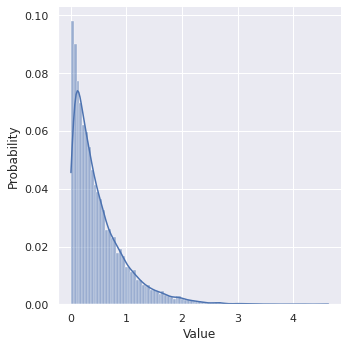

In [111]:
def gen_exponential(l, n):
    """Generates random sample [X1, X2,.. X_n] where Xi ~ Exp(l)"""
    return [(-1.0/l)*math.log(np.random.random()) for i in range(n)]

sns.displot({"Value": gen_exponential(2,10000)}, x = "Value", stat="probability",
                                            kde=True, kde_kws={"bw_adjust": 1})

##### Illustation of memorylessness
see task1.ipynp

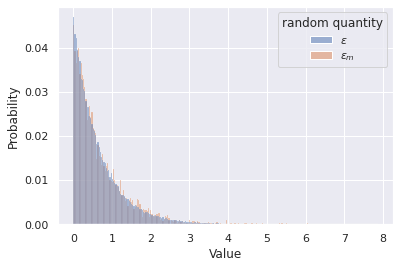

In [48]:
l, N = 1.5, 100000
m = 2
eps = gen_exponential(l,N)
eps_m = [(val - m) for val in gen_exponential(l,N) if val >= m]
df = pd.concat([pd.DataFrame({"Value": eps,   "random quantity": r'$\varepsilon$'  }),
                pd.DataFrame({"Value": eps_m, "random quantity": r'$\varepsilon_m$'})],
                                                              ignore_index=True)
sns.histplot(data = df, x = "Value", hue = "random quantity", stat = 'probability', common_norm=False)
del l,N,m,eps,eps_m,df

$X_1,X_2,\dots,X_n$ -- independently exponentially distributed with $\lambda_1, \lambda_2, \dots, \lambda_n$  
***Show that:*** $Y = \min(X_1, X_2, \dots, X_n) \sim \prod_{i=1}^{n} F_{Exp(\lambda_i)}$

<AxesSubplot:xlabel='Value', ylabel='Proportion'>

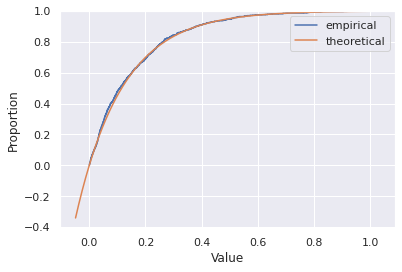

In [94]:
l1,l2,l3 = 1,2,3
N = 1000
smp = np.minimum(np.minimum(gen_exponential(l1,N),gen_exponential(l2,N)),gen_exponential(l3,N))
axes = sns.ecdfplot({"Value": smp}, x = "Value", label = "empirical")

a,b = axes.get_xlim()
X = np.linspace(a,b,N)
sns.lineplot(x = X, y = 1-np.exp(-(l1+l2+l3)*X), label = "theoretical")

***Goal:*** $\pi \sim \mathrm{Pois}(\lambda)$  
***Implementation:*** $\pi = \max\limits_{\mathbb{N}\cup\{0\}}(n \mid S_n = \sum_{i=1}^{n} \varepsilon_i \le 1)$

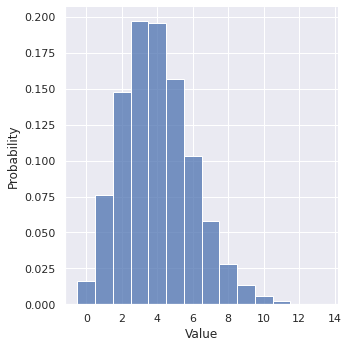

In [117]:
def gen_poission1(l,n):
    """Generates random sample [X1, X2,.. X_n] where Xi ~ Pois(l)"""
    out = []
    for i in range(n):
        sm = 0
        num = 0
        while sm <= 1:
            sm += gen_exponential(l,1)[0]
            num += 1
        num -= 1
        out.append(num)
    return out

sns.displot({"Value": gen_poission1(4,10000)}, x="Value", stat="probability",
                                                                discrete = True)